#Classification With Neural Networks Using Python


## Importing the Dataset

In [1]:
with open('/content/kaggle.json', 'w') as f:
  f.write('{"username":"raghavendragavuji","key":"ac5ced9e5c8778a54e02d519a35834b3"}')
#incase if this throws an error use your kaggle api key, uncomment below snippet and delete this part of code
'''
with open('/content/kaggle.json', 'w') as f:
  f.write('') # <--copy the content of json file here
'''
#Or You can directly import your api json to colab

"\nwith open('/content/kaggle.json', 'w') as f:\n  f.write('') # <--copy the content of json file here\n"

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:47<00:00, 23.2MB/s]
100% 1.06G/1.06G [00:47<00:00, 23.9MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

## Import the libraries:

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

##Prepare dataset for training model:

In [35]:
train_data = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.


In [36]:
validation_data = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 5000 files belonging to 2 classes.


In [37]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_data = train_data.map(process)
validation_data = validation_data.map(process)

##Creating the neural net model:

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) 



In [ ]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

##Analyzing the model:

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_9 (Batc  (None, 125, 125, 64)    

##Defining callbacks and learning rate:

In [14]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

##Model Training:

In [39]:
history = model.fit(train_data,epochs = 10, validation_data = validation_data)

Epoch 1/10
625/625 [==============================] - 82s 131ms/step - loss: 0.4762 - accuracy: 0.7696 - val_loss: 0.5392 - val_accuracy: 0.7366
Epoch 2/10
625/625 [==============================] - 82s 131ms/step - loss: 0.4421 - accuracy: 0.7918 - val_loss: 0.4613 - val_accuracy: 0.7891
Epoch 3/10
625/625 [==============================] - 82s 131ms/step - loss: 0.3765 - accuracy: 0.8311 - val_loss: 0.5791 - val_accuracy: 0.7356
Epoch 4/10
625/625 [==============================] - 82s 130ms/step - loss: 0.3277 - accuracy: 0.8584 - val_loss: 0.4568 - val_accuracy: 0.7879
Epoch 5/10
625/625 [==============================] - 82s 130ms/step - loss: 0.2924 - accuracy: 0.8751 - val_loss: 0.4316 - val_accuracy: 0.8257
Epoch 6/10
625/625 [==============================] - 82s 130ms/step - loss: 0.2285 - accuracy: 0.9070 - val_loss: 0.5918 - val_accuracy: 0.7760
Epoch 7/10
625/625 [==============================] - 82s 130ms/step - loss: 0.1961 - accuracy: 0.9204 - val_loss: 0.4476 - val_ac

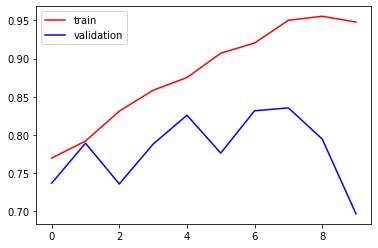

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

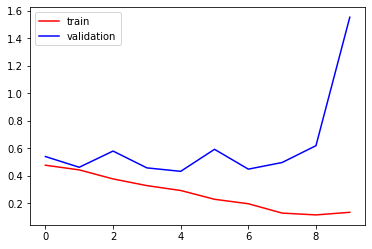

In [41]:
plt.plot(history.history['loss'],color = 'red',label = 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

##Fine tuning

In [42]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.000001),
              metrics=['accuracy'])

In [44]:
history = model.fit(train_data,epochs = 10, validation_data = validation_data)

Epoch 1/10
625/625 [==============================] - 88s 140ms/step - loss: 0.0000e+00 - accuracy: 0.9170 - val_loss: 0.0000e+00 - val_accuracy: 0.8098
Epoch 2/10
625/625 [==============================] - 88s 141ms/step - loss: 0.0000e+00 - accuracy: 0.9196 - val_loss: 0.0000e+00 - val_accuracy: 0.8094
Epoch 3/10
625/625 [==============================] - 88s 141ms/step - loss: 0.0000e+00 - accuracy: 0.9218 - val_loss: 0.0000e+00 - val_accuracy: 0.8096
Epoch 4/10
625/625 [==============================] - 88s 141ms/step - loss: 0.0000e+00 - accuracy: 0.9212 - val_loss: 0.0000e+00 - val_accuracy: 0.8116
Epoch 5/10
625/625 [==============================] - 88s 140ms/step - loss: 0.0000e+00 - accuracy: 0.9228 - val_loss: 0.0000e+00 - val_accuracy: 0.8078
Epoch 6/10
625/625 [==============================] - 88s 140ms/step - loss: 0.0000e+00 - accuracy: 0.9238 - val_loss: 0.0000e+00 - val_accuracy: 0.8096
Epoch 7/10
625/625 [==============================] - 88s 140ms/step - loss: 0.000

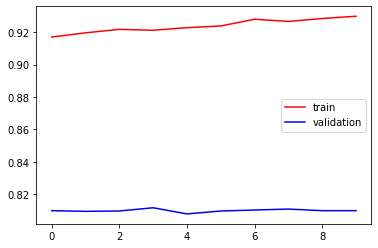

In [47]:
plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

In [ ]:
#The model is validated to ~81% accuracy which can be increased by increasing the training iterations 

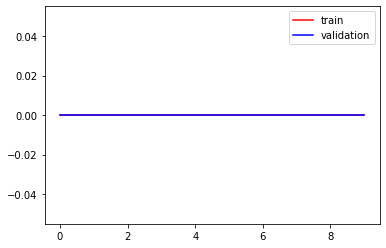

In [48]:
plt.plot(history.history['loss'],color = 'red',label = 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

In [ ]:
#Fine tuned the model and minimised the losses